In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from curvemetrics.src.classes.datafetcher import DataFetcher
from curvemetrics.src.classes.datahandler import DataHandler
from datetime import datetime
import argparse
import asyncio
import os
import json
from web3 import Web3
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
STEP_SIZE = 10 # NOTE: increasing this risks losing txs, 10 is probably safe
INFURA_KEY = os.getenv("INFURA_KEY")
def load_config():
    # Load the configuration
    with open(os.path.join(os.path.abspath('config.json')), "r") as config_file:
        config = json.load(config_file)
    return config

datahandler = DataHandler()
token_metadata = datahandler.get_token_metadata()

datafetcher = DataFetcher(token_metadata=token_metadata)

In [4]:
token = "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48"
chainlink_address = Web3.to_checksum_address("0x8fffffd4afb6115b954bd326cbe7b4ba576818f6")
abi = abi = '[{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"description","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"getRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"version","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]'
client = Web3(Web3.HTTPProvider(f"https://mainnet.infura.io/v3/{INFURA_KEY}"))
contract = client.eth.contract(address=chainlink_address, abi=abi)

In [5]:
start_timestamp = datetime.timestamp(datetime(2023, 3, 9))
end_timestamp = datetime.timestamp(datetime(2023, 3, 15))

In [6]:
ohlcv = datafetcher.get_chainlink_prices(token, chainlink_address, start_timestamp, end_timestamp)
ohlcv = DataHandler.format_token_data(ohlcv)
ohlcv.index = pd.to_datetime(ohlcv['timestamp'], unit='s')
ohlcv

Found the closest round: 36893488147419104086, at 2023-03-08 06:00:23.
Number of iterations: 10


,token_id,symbol,timestamp,open,high,low,close,volume
timestamp,,,,,,,,
2023-03-08 06:00:23,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678255223,None,None,None,0.999964,None
2023-03-09 06:00:35,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678341635,None,None,None,1.000000,None
2023-03-10 06:00:59,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678428059,None,None,None,1.000190,None
2023-03-10 22:27:35,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678487255,None,None,None,0.997559,None
2023-03-11 00:38:11,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678495091,None,None,None,0.995035,None
...,...,...,...,...,...,...,...,...
2023-03-13 15:55:47,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678722947,None,None,None,0.998300,None
2023-03-13 16:08:11,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678723691,None,None,None,0.995800,None
2023-03-13 16:13:11,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678723991,None,None,None,0.998874,None


In [7]:
usdc = '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48'
ccxt_ohlcv = datahandler.get_ohlcv_data(token, start=start_timestamp, end=end_timestamp)

<Axes: xlabel='timestamp'>

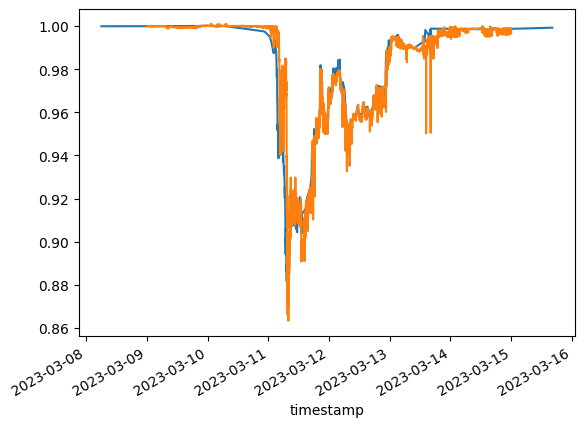

In [8]:
ohlcv['close'].plot()
ccxt_ohlcv['close'].plot()

In [17]:
ohlcv.loc['2023-03'][ohlcv['close'] < 0.99]

,token_id,symbol,timestamp,open,high,low,close,volume
timestamp,,,,,,,,
2023-03-11 01:54:47,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678499687,None,None,None,0.988432,None
2023-03-11 01:59:11,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678499951,None,None,None,0.987782,None
2023-03-11 02:17:11,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678501031,None,None,None,0.987459,None
2023-03-11 03:07:47,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678504067,None,None,None,0.987925,None
2023-03-11 03:11:47,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678504307,None,None,None,0.985346,None
...,...,...,...,...,...,...,...,...
2023-03-12 22:23:23,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678659803,None,None,None,0.978114,None
2023-03-12 22:25:47,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678659947,None,None,None,0.981350,None
2023-03-12 22:29:23,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC/USD,1678660163,None,None,None,0.985360,None


In [ ]:
# start = datetime.timestamp(datetime(2022, 5, 1))
start = 1649264925
end = datetime.timestamp(datetime(2022, 5, 20))
config = load_config()
ust = "0xa693b19d2931d498c5b318df961919bb4aee87a5"
addy = "0x8b6d9085f310396C6E4f0012783E9f850eaa8a82"
# token_data = datafetcher.get_chainlink_prices(ust, addy, start, end)
# df = DataHandler.format_token_data(token_data)
# df.to_csv("./temp_ust_data.csv")
df = pd.read_csv("./temp_ust_data.csv", index_col=0)
df.index = df['timestamp'].apply(datetime.fromtimestamp)
df.head()

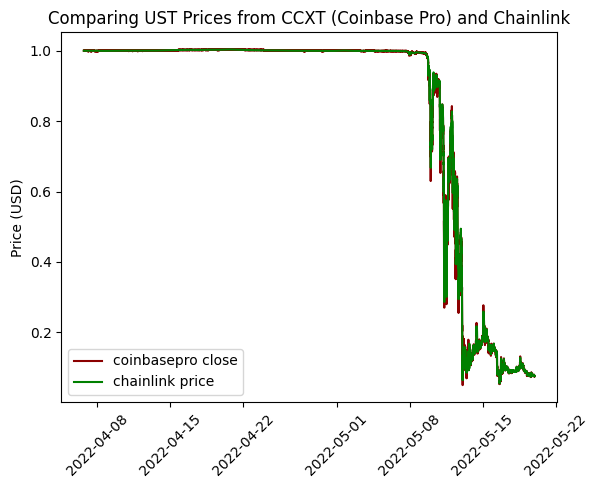

In [85]:
f, ax = plt.subplots()

ax.plot(ohlcv.index, ohlcv["close"], label="coinbasepro close", c='darkred')
ax.plot(df.index, df["close"], label="chainlink price", c='green')
ax.set_ylabel("Price (USD)")
ax.tick_params(axis='x', rotation=45)
ax.legend()
ax.set_title("Comparing UST Prices from CCXT (Coinbase Pro) and Chainlink")
f.savefig('./figs/ust_prices.png')
f.show()

In [21]:
# start = datetime.timestamp(datetime(2022, 11, 1))
start = 1635284389
end = datetime.timestamp(datetime(2023, 2, 1))

addy = "0x099c9588D8C6F7579C89014e59002881CE0c46A1"
usdn = "0x674c6ad92fd080e4004b2312b45f796a192d27a0"

usdn_data = datahandler.get_ohlcv_data(usdn, start=start, end=end)

<Axes: xlabel='timestamp'>

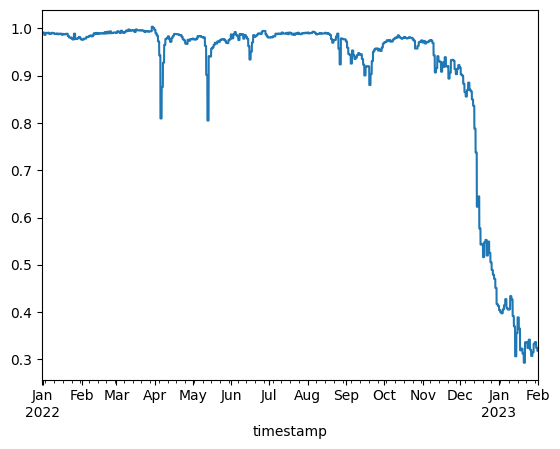

In [23]:
usdn_data['close'].plot()

In [27]:
usdn_data['close'].resample('1d').last().loc['2022-05']

timestamp
2022-05-01    0.976702
2022-05-02    0.976375
2022-05-03    0.978367
2022-05-04    0.983863
2022-05-05    0.983269
2022-05-06    0.983999
2022-05-07    0.982100
2022-05-08    0.980895
2022-05-09    0.980939
2022-05-10    0.963112
2022-05-11    0.901816
2022-05-12    0.805275
2022-05-13    0.941453
2022-05-14    0.940631
2022-05-15    0.957374
2022-05-16    0.959704
2022-05-17    0.965351
2022-05-18    0.969790
2022-05-19    0.968114
2022-05-20    0.972714
2022-05-21    0.971455
2022-05-22    0.975269
2022-05-23    0.977135
2022-05-24    0.976606
2022-05-25    0.977403
2022-05-26    0.974333
2022-05-27    0.969722
2022-05-28    0.968950
2022-05-29    0.975213
2022-05-30    0.977445
2022-05-31    0.987129
Freq: D, Name: close, dtype: float64

<Axes: xlabel='timestamp'>

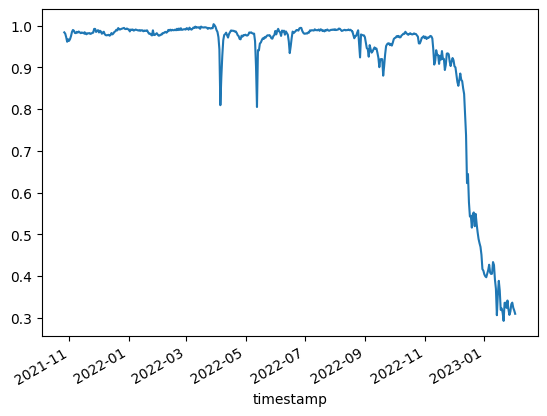

In [10]:
df['close'].plot()

In [6]:
chainlink_address = Web3.to_checksum_address("0x099c9588D8C6F7579C89014e59002881CE0c46A1")
abi = abi = '[{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"description","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"getRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"version","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]'
client = Web3(Web3.HTTPProvider(f"https://mainnet.infura.io/v3/{INFURA_KEY}"))
contract = client.eth.contract(address=chainlink_address, abi=abi)
symbol = contract.functions.description().call().replace(" ", "")

In [8]:
contract.functions.getRoundData(1).call()

[1, 98404225, 1635284389, 1635284389, 1]

In [26]:
datetime.fromtimestamp(1675776755)

datetime.datetime(2023, 2, 7, 13, 32, 35)

In [29]:
512 >> 64

0

In [50]:
res = contract.functions.getRoundData(376).call()
print(res)
print(datetime.fromtimestamp(res[3]))

[376, 96807200, 1664501879, 1664501879, 376]
2022-09-30 01:37:59


In [43]:
contract.functions.decimals().call()

8

In [13]:
usdt = '0xdac17f958d2ee523a2206206994597c13d831ec7'
usdt_ohlcv = datahandler.get_ohlcv_data(usdt, start=datetime.timestamp(datetime(2022, 1, 1)), end=datetime.timestamp(datetime(2023, 1, 1)))
usdt_ohlcv = usdt_ohlcv['close']
usdt_ohlcv.name = token_metadata[usdt]['symbol']
usdt_ohlcv.head()

timestamp
2022-01-01 00:01:00    1.0000
2022-01-01 00:02:00    1.0001
2022-01-01 00:03:00    1.0001
2022-01-01 00:04:00    0.9999
2022-01-01 00:05:00    1.0001
Freq: T, Name: USDT, dtype: float64

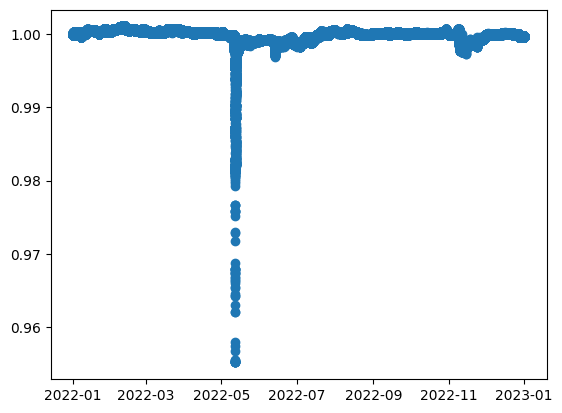

In [17]:
f, ax = plt.subplots()

ax.scatter(usdt_ohlcv.index, usdt_ohlcv)